In [11]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.manifold import TSNE
import csv
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from adjustText import adjust_text


color_list = [
    'lightgreen', 'limegreen', 'forestgreen', 'mediumseagreen', 'darkcyan',
    'turquoise', 'deepskyblue', 'dodgerblue', 'royalblue', 'darkblue', 'darkslateblue',
    'rebeccapurple', 'blueviolet', 'darkmagenta', 'orchid', 'plum'
]


def adjust_figsize(x, y, max_pixels=20):
    width = max(x) - min(x)
    height = max(y) - min(y)
    current_pixels = max(width, height)
    if current_pixels > max_pixels:
        ratio = max_pixels / current_pixels
        width = int(width * ratio)
        height = int(height * ratio)
    return width, height


def neighbour_path(models, folder, word, rs=42):
    """
    Search for the nearest neighbours for target word at different times
    Plot the path of word vectors across time in their neighbourhood
    """

    csv_file = 'neighbourhood/' + folder + '/' + word + '.csv'
    fieldnames = ['word'] + ['neighbour' + str(i + 1) for i in range(10)]

    with open(csv_file, 'w', newline='', encoding='utf-8') as f:
        writer = csv.DictWriter(f, fieldnames=fieldnames)
        writer.writeheader()

    labels = []
    vectors = []
    year = 1945

    for model in models:
        labels.append(word + str(year))
        vectors.append(model.wv[word])
        neighbours = model.wv.most_similar(word, topn=10)

        row = [word] + [pair[0] for pair in neighbours]
        with open(csv_file, 'a', newline='', encoding='utf-8') as f:
            writer = csv.writer(f)
            writer.writerow(row)

        for neighbour in neighbours[:5]:
            # print(neighbour)
            labels.append(neighbour[0])
            vectors.append(model.wv[neighbour[0]])
        year += 5

    tsne_model = TSNE(perplexity=30, n_components=2, init='pca', n_iter=1000, random_state=rs)
    flattend_2d = tsne_model.fit_transform(vectors)

    x, y = [], []
    for value in flattend_2d:
        x.append(value[0])
        y.append(value[1])
    
    x_line, y_line = [], []
    for i in range(len(labels) // 6):
        x_line.append(x[i * 6])
        y_line.append(y[i * 6])

    # print(max(x), min(x), max(y), min(y))
    plt.figure(figsize=adjust_figsize(x, y))
    plt.axis('off')
    plt.plot(x_line, y_line, color='steelblue')

    texts = []
    for i in range(len(labels) // 6):
        index = i * 6
        color = color_list[i]
        plt.scatter(x[index], y[index], s=40, c=color)
        texts.append(plt.annotate(labels[index], xy=(x[index], y[index]),
            fontproperties=FontProperties('Noto Sans SC', weight='bold'), fontsize = 25, color=color))
        for j in range(5):
            index += 1
            plt.scatter(x[index], y[index], s=10, c=color)
            texts.append(plt.annotate(labels[index], xy=(x[index], y[index]),
                fontproperties=FontProperties('Noto Sans SC'), fontsize = 15, color=color))
    
    adjust_text(texts, iter_lim=1000)
    plt.tight_layout()
    plt.savefig('visualize_path/' + folder + '/' + word + '.png', bbox_inches='tight')

In [4]:
from gensim.models.word2vec import Word2Vec

modeldir = '../../alignment/5-year/model/'
models_alignment = []

for i in range(1945, 2025, 5):
    fiveyear = modeldir + str(i) + '-' + str(i + 4) + '.model'
    model = Word2Vec.load(fiveyear)
    models_alignment.append(model)

In [12]:
modeldir = '../../compass/5-year/model/'
models_compass = []

for i in range(1945, 2025, 5):
    fiveyear = modeldir + str(i) + '-' + str(i + 4) + '.model'
    model = Word2Vec.load(fiveyear)
    models_compass.append(model)

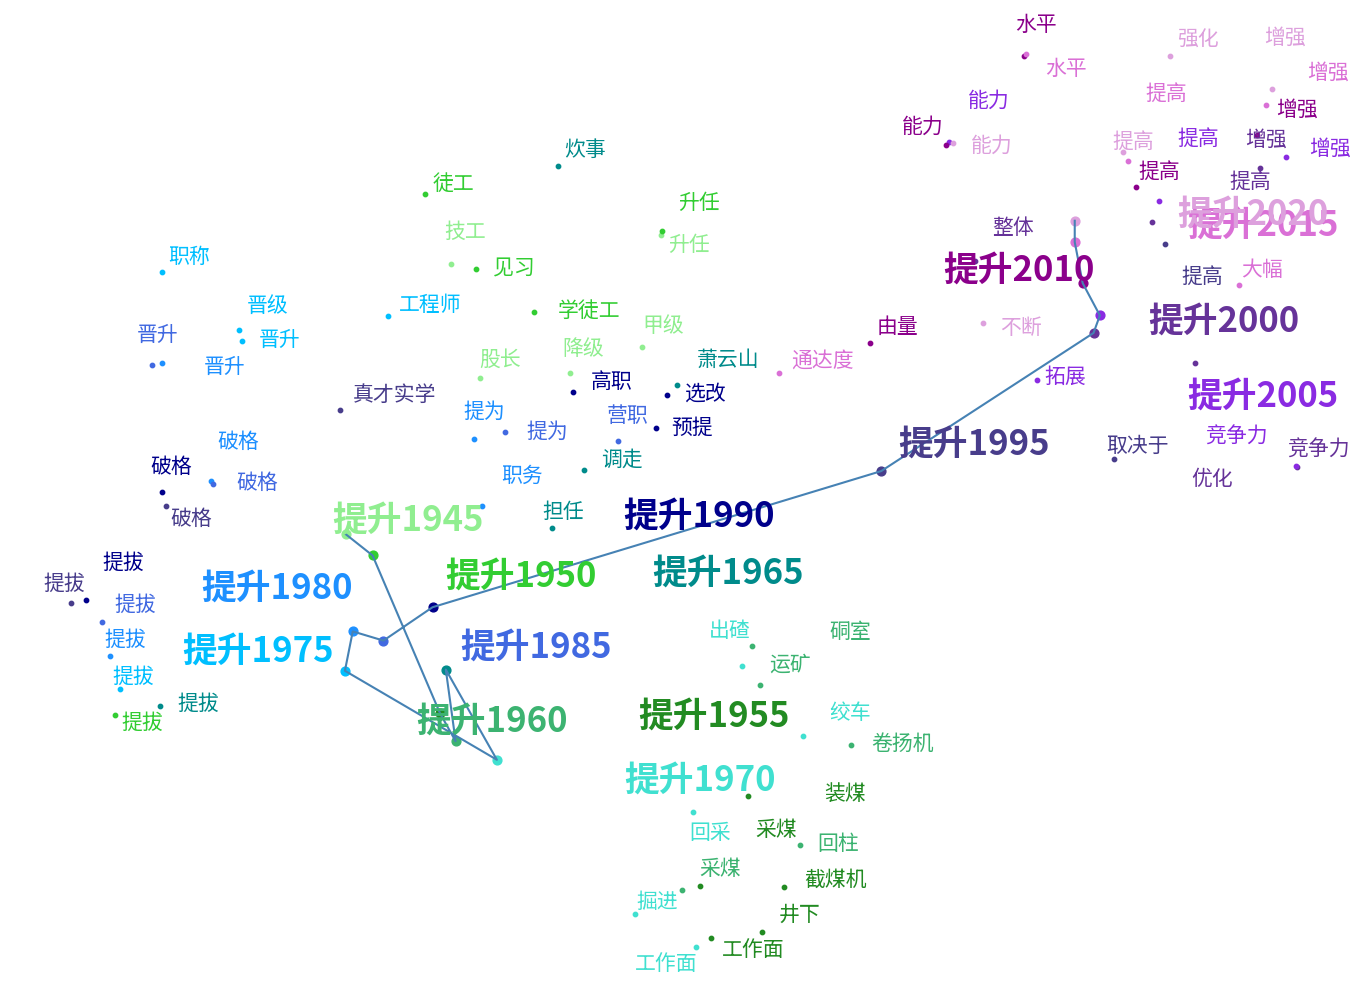

In [17]:
neighbour_path(models_compass, 'compass', '提升')